In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv("AC_Data.csv", parse_dates={"Date":['0',]})
df.Date = pd.to_datetime(df.Date, dayfirst=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    87840 non-null  datetime64[ns]
 1   AC 1    43708 non-null  float64       
 2   AC 2    43711 non-null  float64       
 3   AC 3    43713 non-null  float64       
 4   AC 4    43704 non-null  float64       
 5   AC 5    43716 non-null  float64       
 6   AC 6    43717 non-null  float64       
 7   AC 7    43679 non-null  float64       
 8   AC 8    43704 non-null  float64       
 9   AC 9    43654 non-null  float64       
 10  AC 10   43690 non-null  float64       
 11  AC 11   43670 non-null  float64       
 12  AC 12   43713 non-null  float64       
 13  AC 13   43719 non-null  float64       
 14  AC 14   43696 non-null  float64       
 15  AC 15   43715 non-null  float64       
 16  AC 16   43710 non-null  float64       
 17  AC 17   43714 non-null  float64       
 18  AC 18 

In [4]:
df.isnull().sum()

Date         0
AC 1     44132
AC 2     44129
AC 3     44127
AC 4     44136
AC 5     44124
AC 6     44123
AC 7     44161
AC 8     44136
AC 9     44186
AC 10    44150
AC 11    44170
AC 12    44127
AC 13    44121
AC 14    44144
AC 15    44125
AC 16    44130
AC 17    44126
AC 18    44117
dtype: int64

In [5]:
# Used linear interpolator for values sampled at every 2m to upsample it to 1m with limit of 2 so that continuous NaN values are left as is
for col in df.columns:
    df[col].interpolate(method='linear', inplace=True, limit=2)
df

,Date,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-01-08 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-01-08 00:01:00,7.472373,8.864465,0.000000,0.000000,2.599335,3.930136,2.655821,4.840935,5.285762,2.282977,1.876628,1.189552,3.114025,2.734977,4.360098,4.049972,3.262830,6.557740
2,2019-01-08 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-01-08 00:03:00,7.239550,9.050859,0.000000,0.000000,2.586860,3.790679,2.430835,5.689972,4.672429,2.325915,2.756904,2.064570,3.108955,2.698672,3.420724,3.892182,3.176074,6.371487
4,2019-01-08 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87835,2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
87836,2019-09-30 23:56:00,0.604588,6.137458,2.201809,1.041657,1.247176,0.000000,3.409834,2.939000,3.516121,2.023170,5.096968,2.963285,3.717341,2.249775,4.060122,1.862619,3.009743,7.197318
87837,2019-09-30 23:57:00,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647
87838,2019-09-30 23:58:00,1.319809,6.115407,2.051292,0.000000,1.512797,2.182120,3.138793,3.079457,3.702460,2.099703,4.997998,3.068102,3.583383,2.004632,4.041915,1.866526,3.000690,7.157183


In [6]:
df.isnull().sum()

Date       0
AC 1     326
AC 2     327
AC 3     328
AC 4     331
AC 5     318
AC 6     323
AC 7     362
AC 8     333
AC 9     385
AC 10    345
AC 11    369
AC 12    320
AC 13    316
AC 14    342
AC 15    320
AC 16    323
AC 17    319
AC 18    310
dtype: int64

In [7]:
df.dtypes

Date     datetime64[ns]
AC 1            float64
AC 2            float64
AC 3            float64
AC 4            float64
AC 5            float64
AC 6            float64
AC 7            float64
AC 8            float64
AC 9            float64
AC 10           float64
AC 11           float64
AC 12           float64
AC 13           float64
AC 14           float64
AC 15           float64
AC 16           float64
AC 17           float64
AC 18           float64
dtype: object

In [8]:
# Swapped day and month entries for days less than 13 as those are wrongly placed datetime

df['Date'] = pd.to_datetime(df.Date, unit='ns')
df['Date'] = df['Date'].apply(lambda x: x.replace(microsecond=0))
df['date'] = [d.date() for d in df['Date']]
df['time'] = [d.time() for d in df['Date']]
df[['year','month','day']] = df['date'].apply(lambda x: pd.Series(x.strftime("%Y-%m-%d").split("-")))

df['day'] = pd.to_numeric(df['day'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

#Loop to look for days less than 13 and then swap the day and month
for index, d in enumerate(df['day']):
    if(d <13): 
        df.loc[index,'day'],df.loc[index,'month']=df.loc[index,'month'],df.loc[index,'day'] 

In [9]:
# convert series to string type in order to merge them

df['day'] = df['day'].astype(str)
df['month'] = df['month'].astype(str)
df['year'] = df['year'].astype(str)
df['date']=  pd.to_datetime(df[['year', 'month', 'day']])
df['date'] = df['date'].astype(str)
df['time'] = df['time'].astype(str)

In [10]:
# merge time and date and place result in our column
df['Date'] =pd.to_datetime(df['date']+ ' '+df['time'])

# drop the added columns
df.drop(df[['date','year', 'month', 'day','time']], axis=1, inplace = True)
df

,Date,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,7.472373,8.864465,0.000000,0.000000,2.599335,3.930136,2.655821,4.840935,5.285762,2.282977,1.876628,1.189552,3.114025,2.734977,4.360098,4.049972,3.262830,6.557740
2,2019-08-01 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,7.239550,9.050859,0.000000,0.000000,2.586860,3.790679,2.430835,5.689972,4.672429,2.325915,2.756904,2.064570,3.108955,2.698672,3.420724,3.892182,3.176074,6.371487
4,2019-08-01 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87835,2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
87836,2019-09-30 23:56:00,0.604588,6.137458,2.201809,1.041657,1.247176,0.000000,3.409834,2.939000,3.516121,2.023170,5.096968,2.963285,3.717341,2.249775,4.060122,1.862619,3.009743,7.197318
87837,2019-09-30 23:57:00,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647
87838,2019-09-30 23:58:00,1.319809,6.115407,2.051292,0.000000,1.512797,2.182120,3.138793,3.079457,3.702460,2.099703,4.997998,3.068102,3.583383,2.004632,4.041915,1.866526,3.000690,7.157183


In [11]:
df.set_index('Date', inplace=True)
power_cut = df[df.isna().all(axis=1)].index
power_cut

DatetimeIndex(['2019-08-02 17:53:00', '2019-08-04 01:21:00',
               '2019-08-04 01:22:00', '2019-08-04 01:23:00',
               '2019-08-04 01:24:00', '2019-08-04 01:25:00',
               '2019-08-04 01:26:00', '2019-08-04 01:27:00',
               '2019-08-04 01:28:00', '2019-08-04 01:29:00',
               ...
               '2019-09-06 15:39:00', '2019-09-06 15:40:00',
               '2019-09-06 15:41:00', '2019-09-06 15:42:00',
               '2019-09-06 15:43:00', '2019-09-06 15:44:00',
               '2019-09-06 15:45:00', '2019-09-06 15:46:00',
               '2019-09-06 15:47:00', '2019-09-06 15:48:00'],
              dtype='datetime64[ns]', name='Date', length=235, freq=None)

(18110.0, 18145.708333333332)

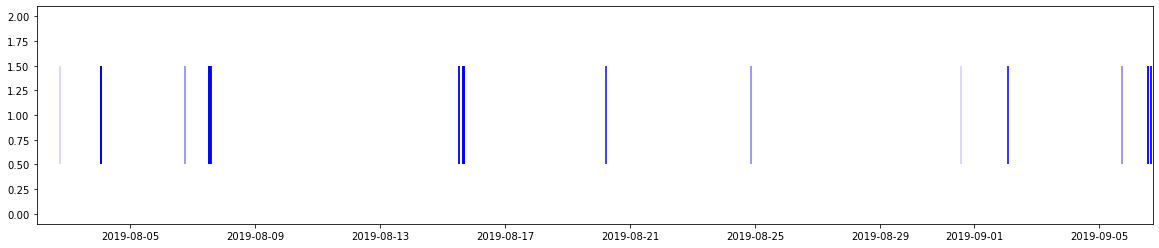

In [12]:
# Powercuts at these intervals on these days
fig, ax = plt.subplots(figsize=(20, 4))
plt.hlines(1,1,20)  # Draw a horizontal line
plt.eventplot(power_cut, orientation='horizontal', colors='b', linewidths=0.3)
plt.xlim(pd.Timestamp('2019-08-02 00:00:00'), pd.Timestamp('2019-09-06 17:00:00'))

In [13]:
# Replacing the NaN values with 0
df = df.fillna(0)
df.isnull().sum()

AC 1     0
AC 2     0
AC 3     0
AC 4     0
AC 5     0
AC 6     0
AC 7     0
AC 8     0
AC 9     0
AC 10    0
AC 11    0
AC 12    0
AC 13    0
AC 14    0
AC 15    0
AC 16    0
AC 17    0
AC 18    0
dtype: int64

In [14]:
Weekday = df.index.day_name()
df.insert(0, 'Weekday', Weekday)
df

,Weekday,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date,,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,Thursday,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2019-08-01 00:01:00,Thursday,7.472373,8.864465,0.000000,0.000000,2.599335,3.930136,2.655821,4.840935,5.285762,2.282977,1.876628,1.189552,3.114025,2.734977,4.360098,4.049972,3.262830,6.557740
2019-08-01 00:02:00,Thursday,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2019-08-01 00:03:00,Thursday,7.239550,9.050859,0.000000,0.000000,2.586860,3.790679,2.430835,5.689972,4.672429,2.325915,2.756904,2.064570,3.108955,2.698672,3.420724,3.892182,3.176074,6.371487
2019-08-01 00:04:00,Thursday,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 23:55:00,Monday,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
2019-09-30 23:56:00,Monday,0.604588,6.137458,2.201809,1.041657,1.247176,0.000000,3.409834,2.939000,3.516121,2.023170,5.096968,2.963285,3.717341,2.249775,4.060122,1.862619,3.009743,7.197318
2019-09-30 23:57:00,Monday,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647


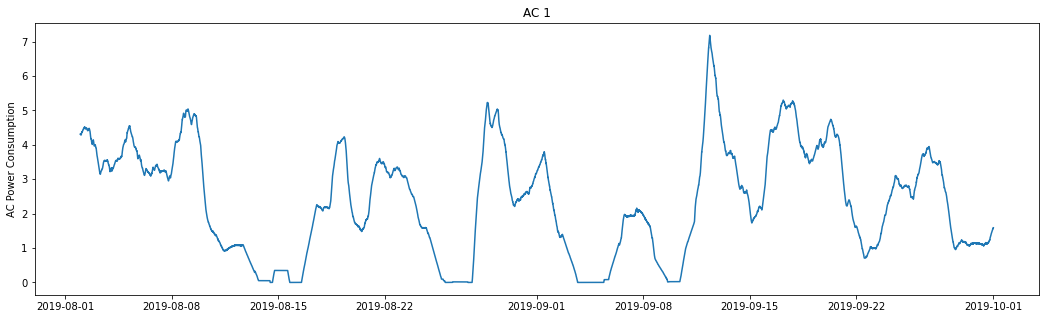

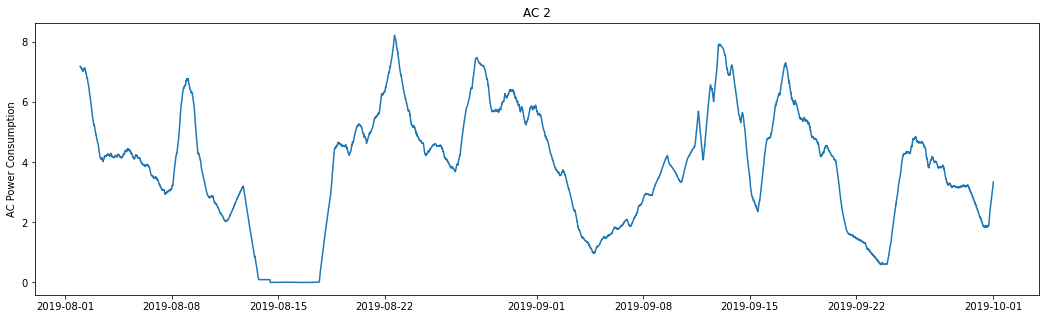

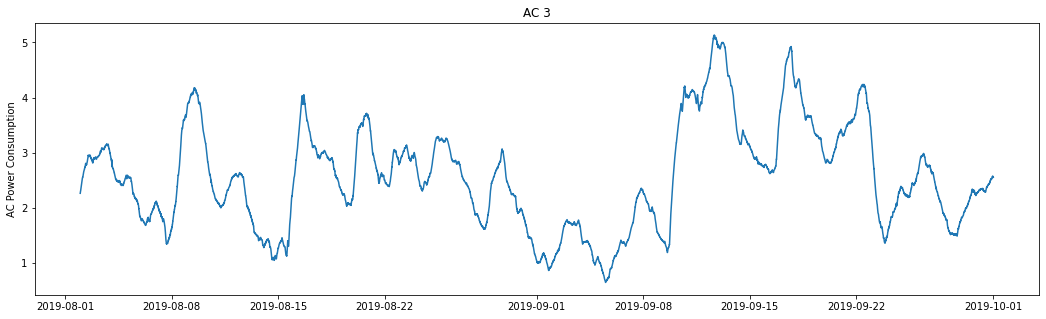

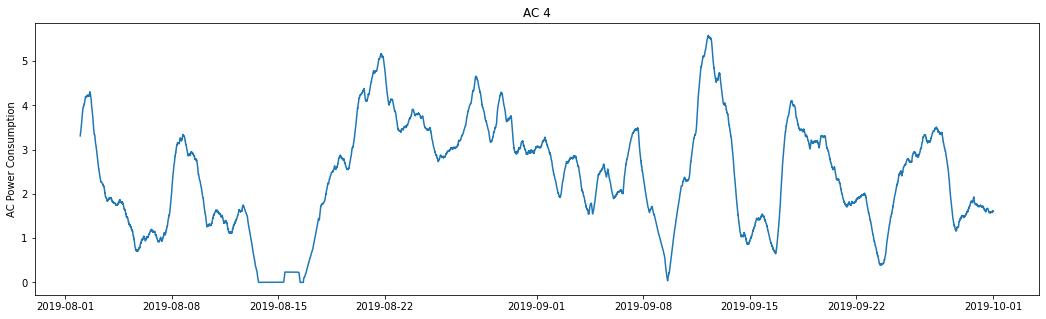

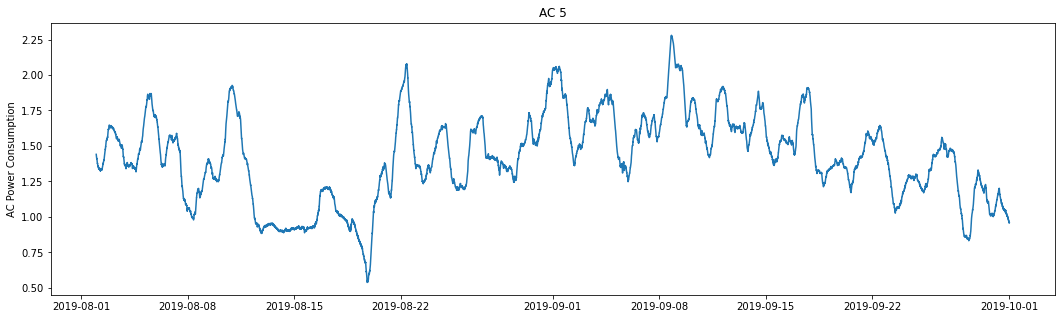

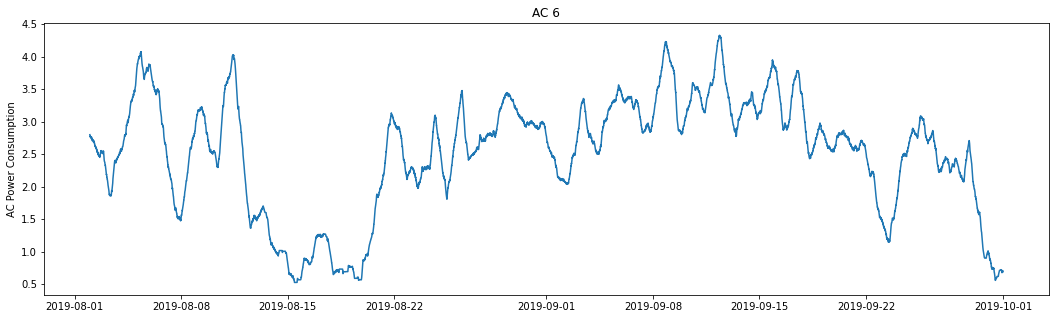

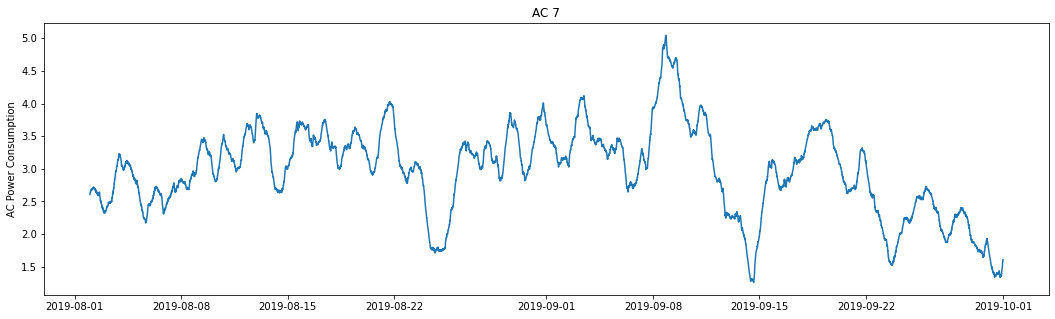

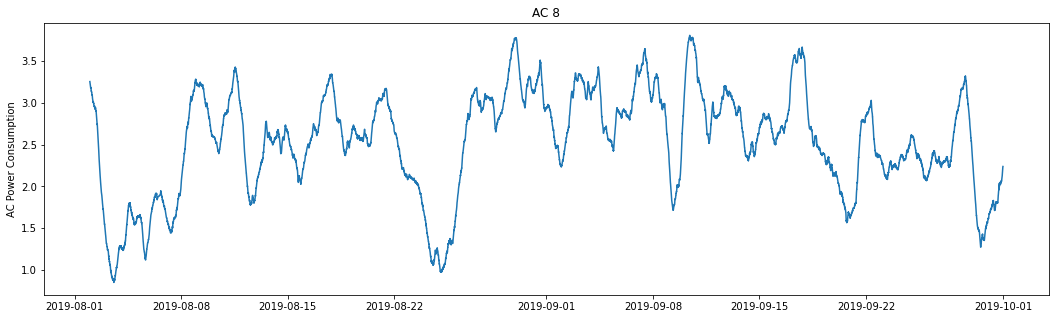

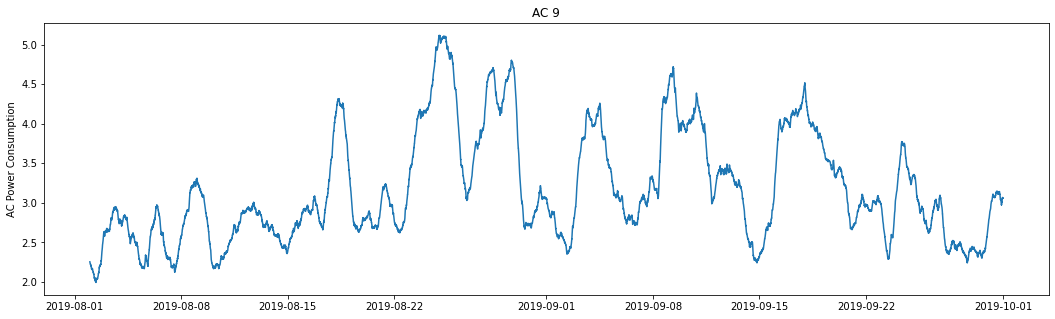

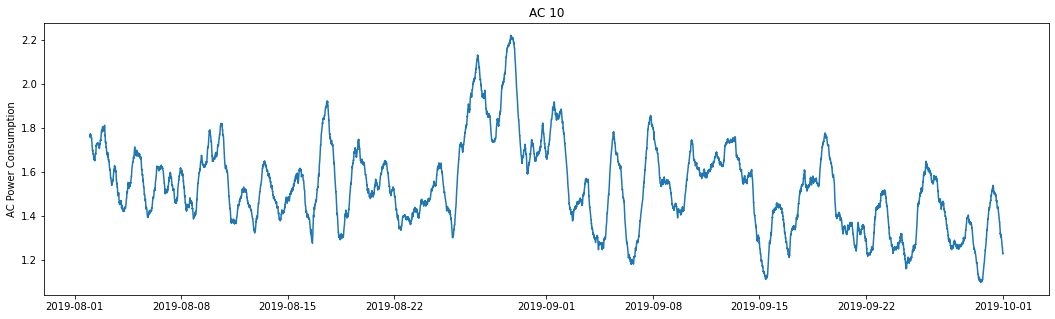

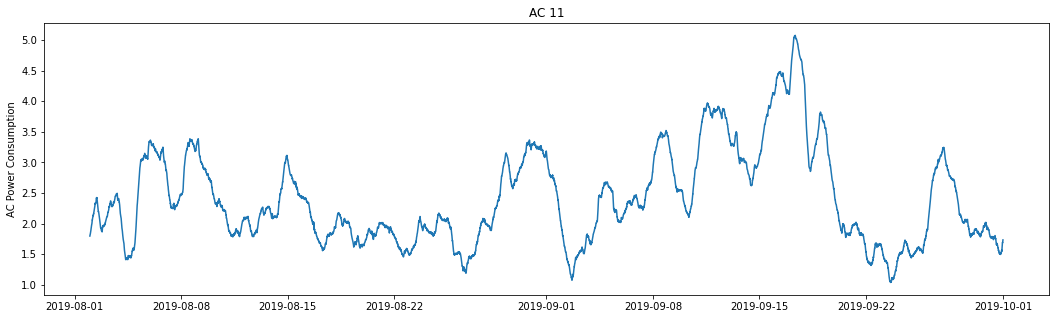

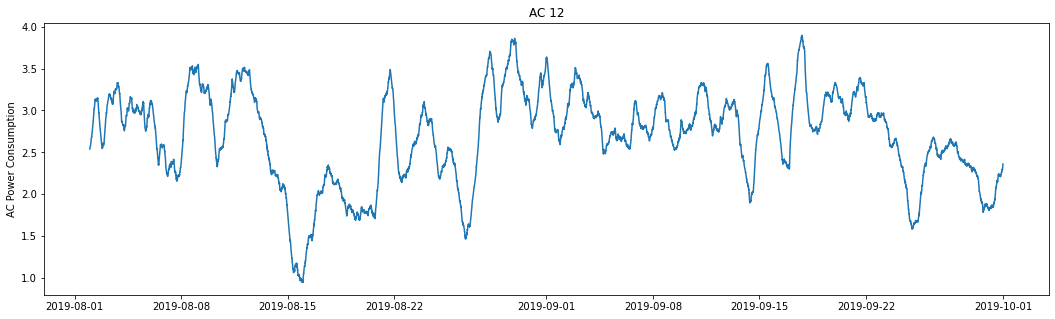

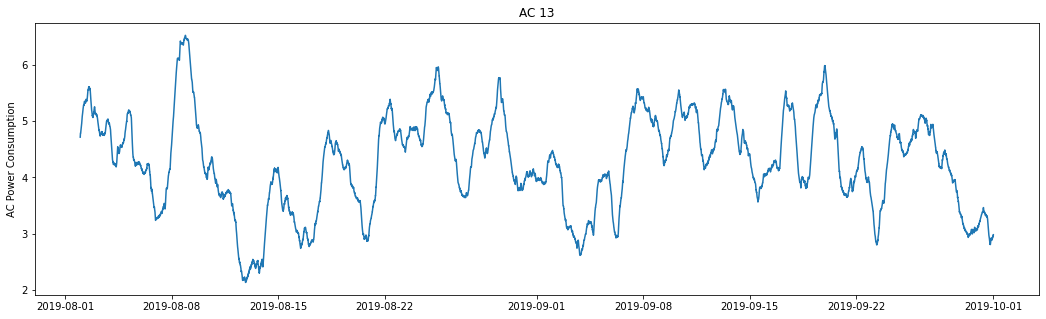

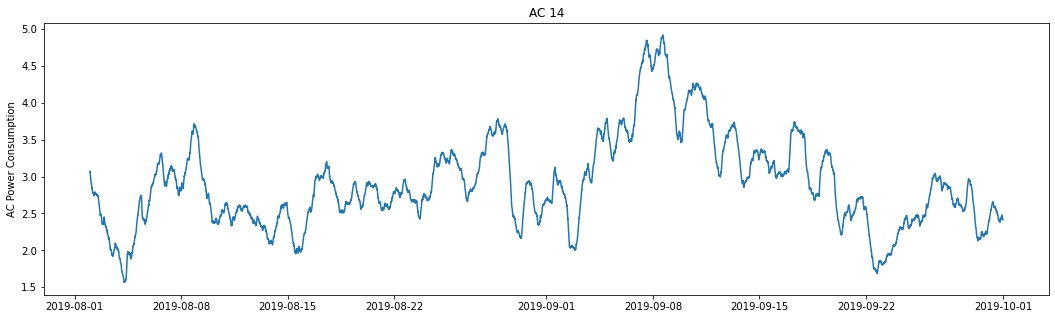

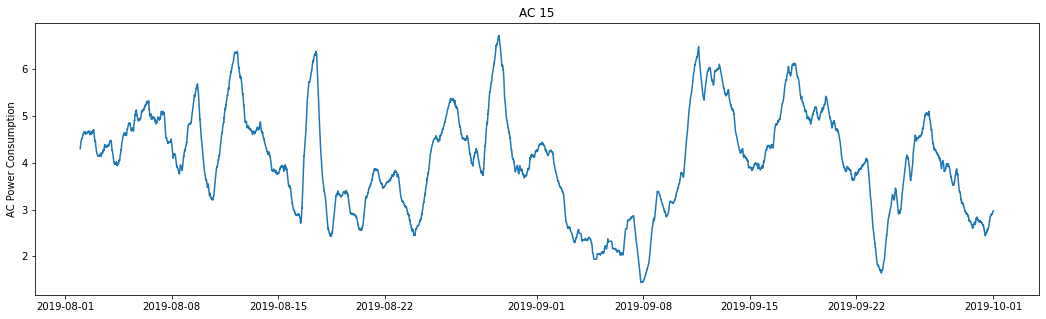

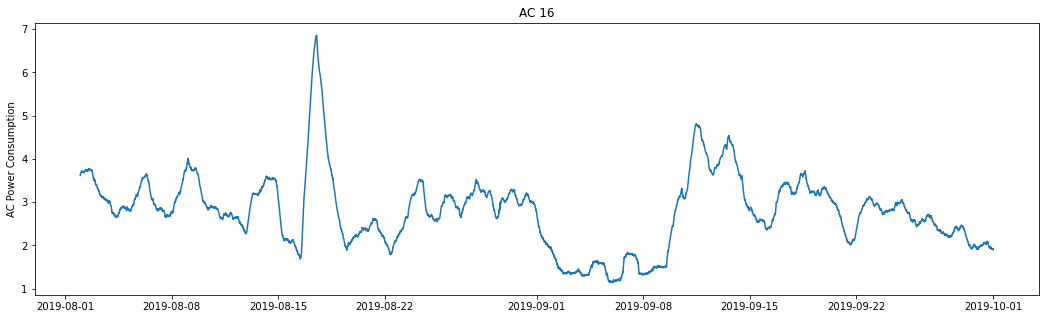

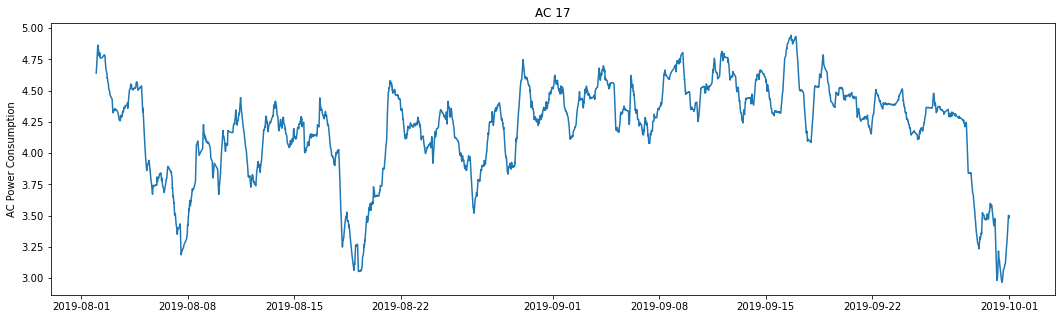

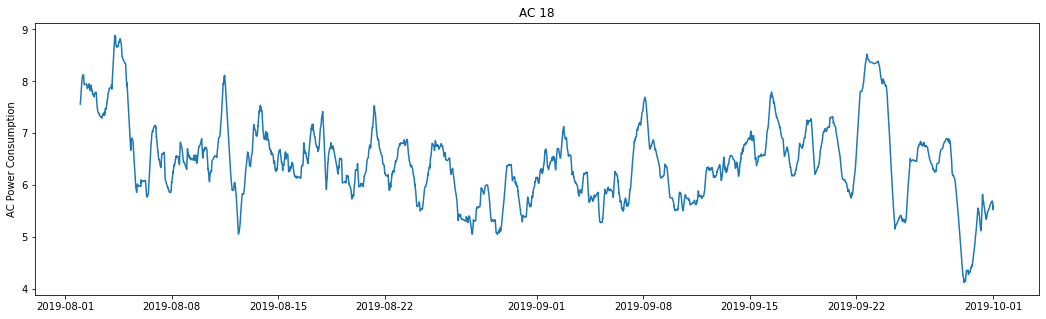

In [15]:
# Daily mean power consumption plot for each AC
for col in df.columns:
    if col != "Weekday":
        plt.figure(figsize= (18,5))
        plt.plot(df.rolling(window=1440).mean()[col]);
        plt.title(col)
        plt.ylabel('AC Power Consumption')

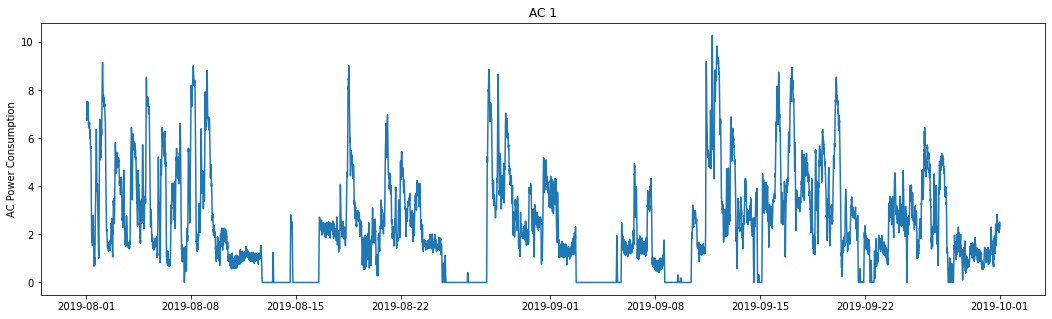

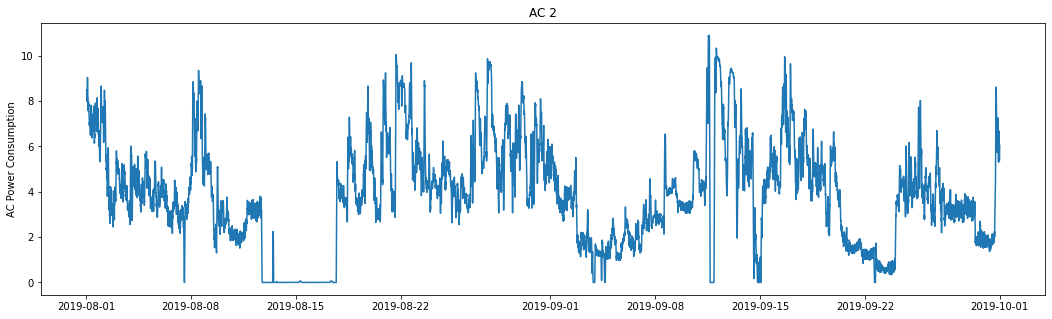

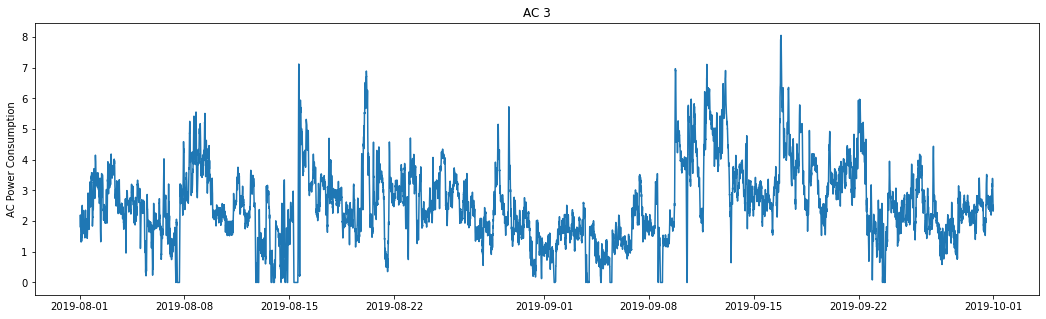

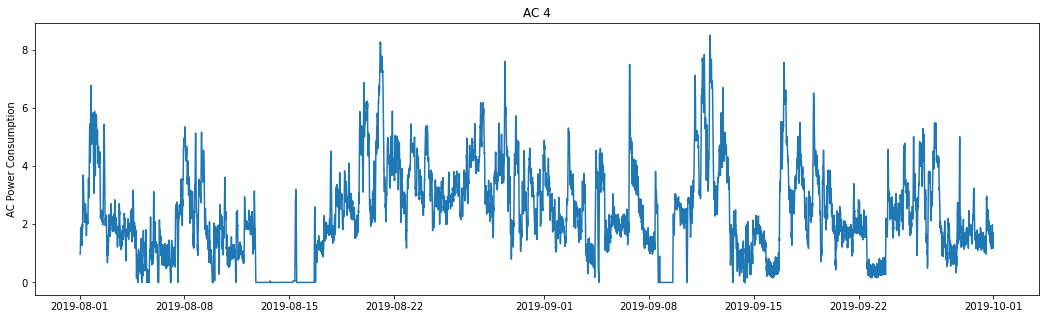

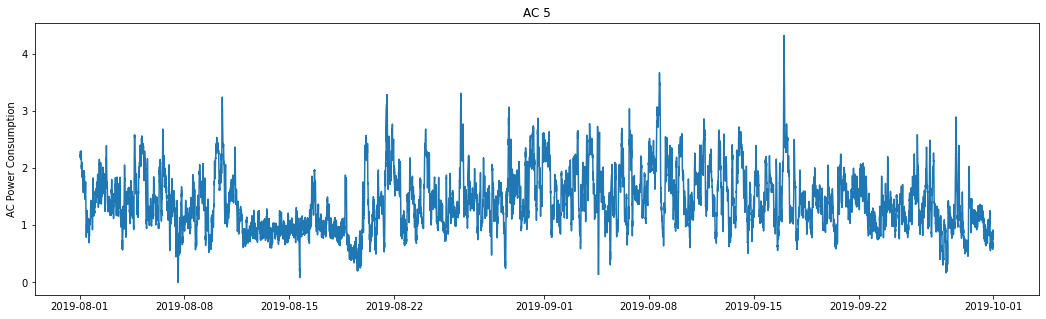

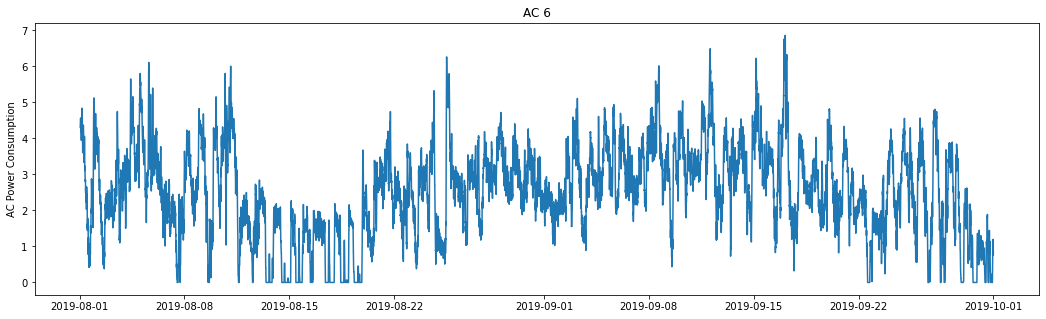

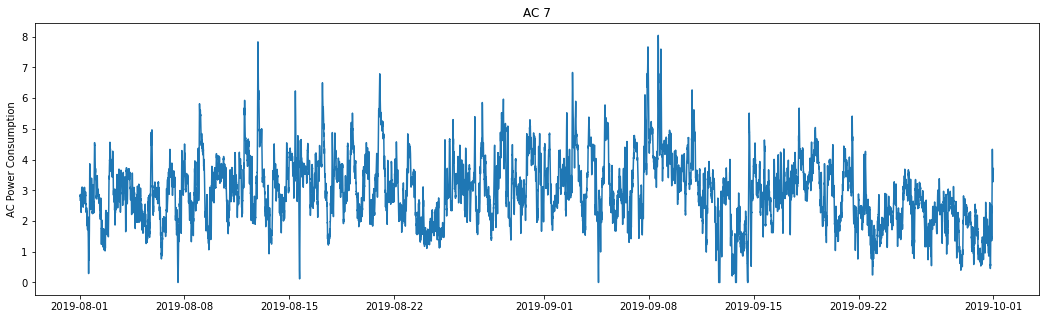

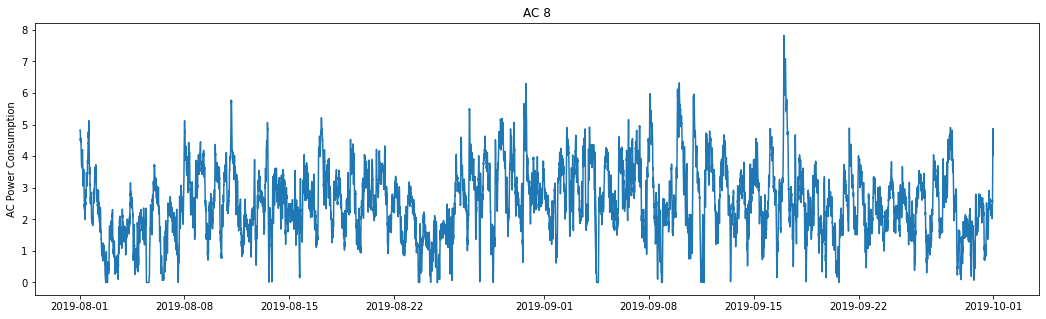

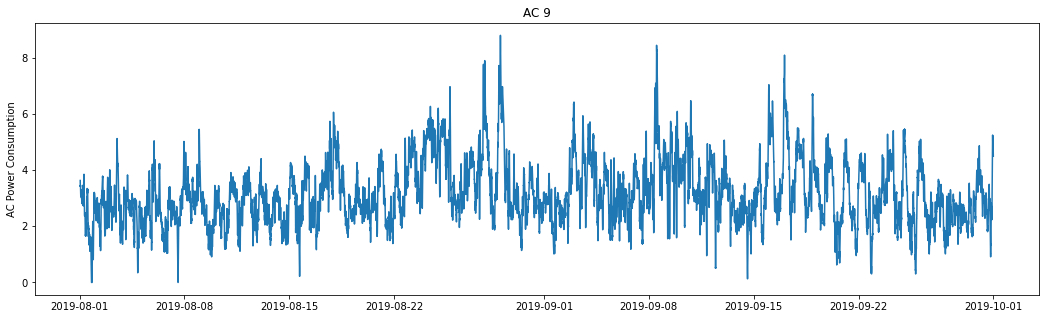

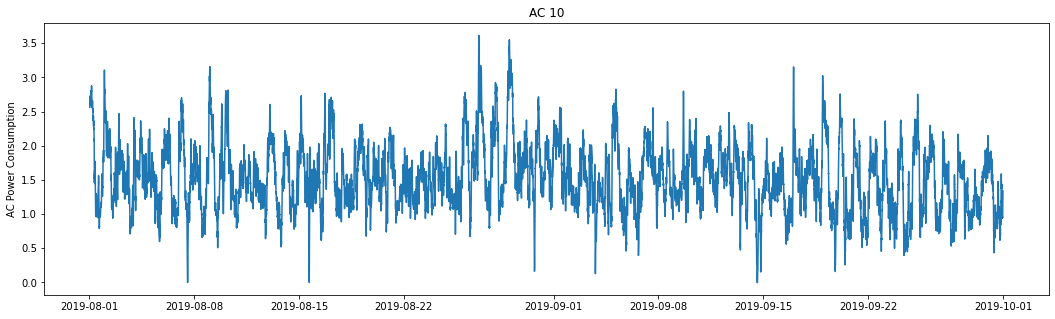

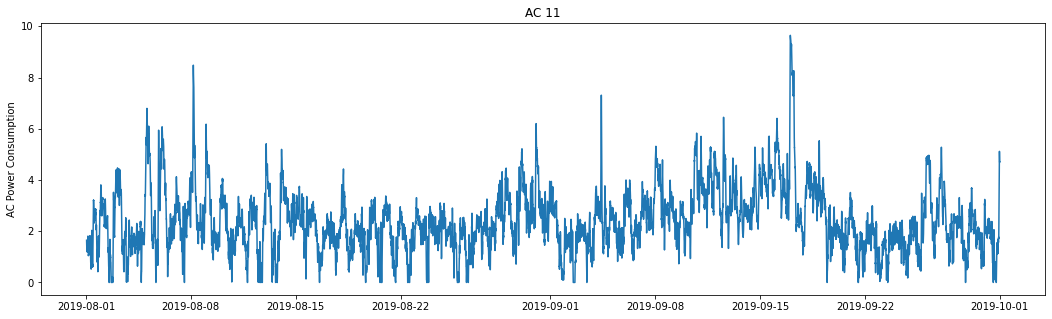

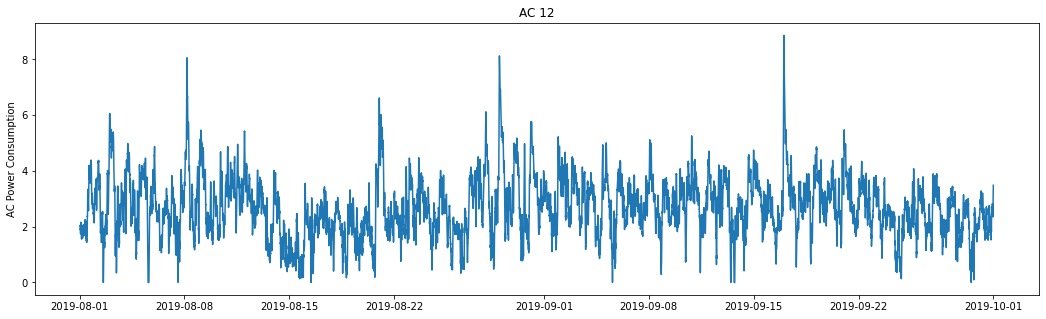

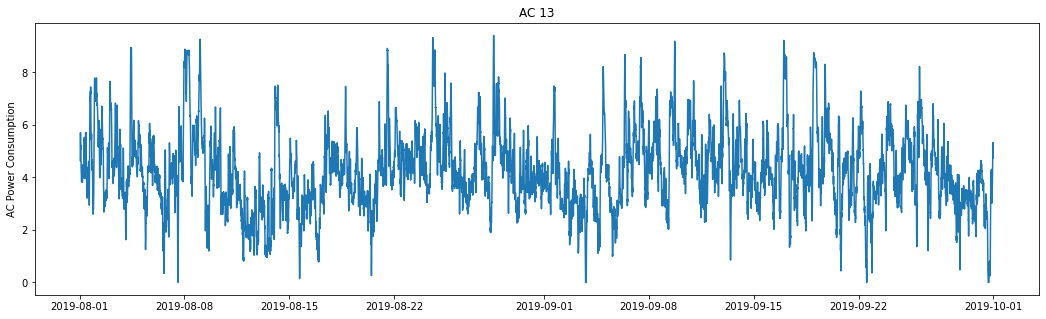

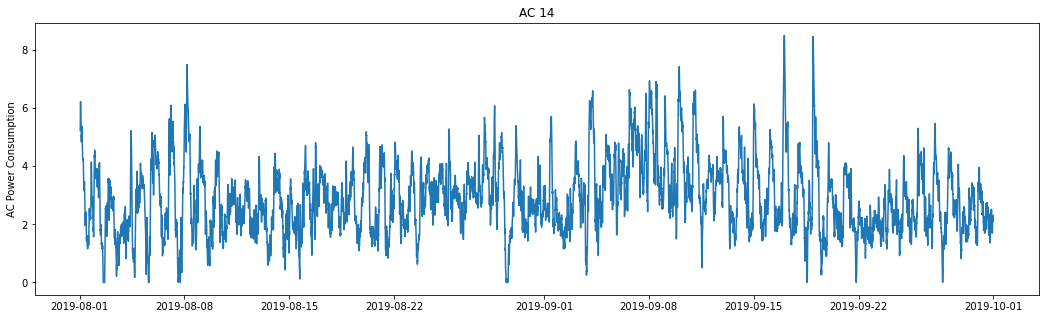

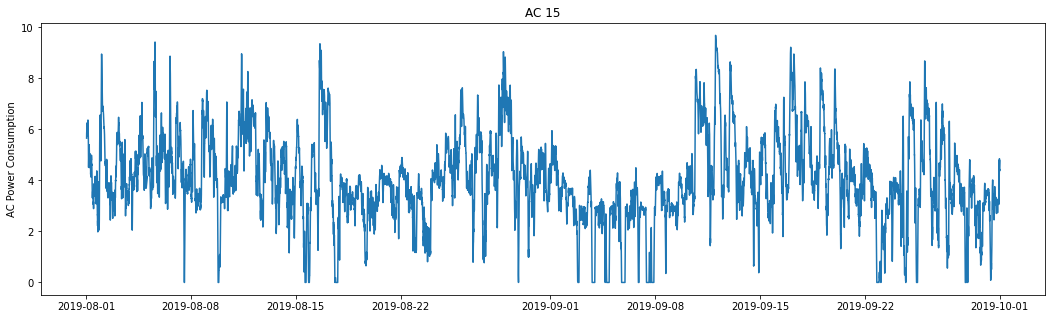

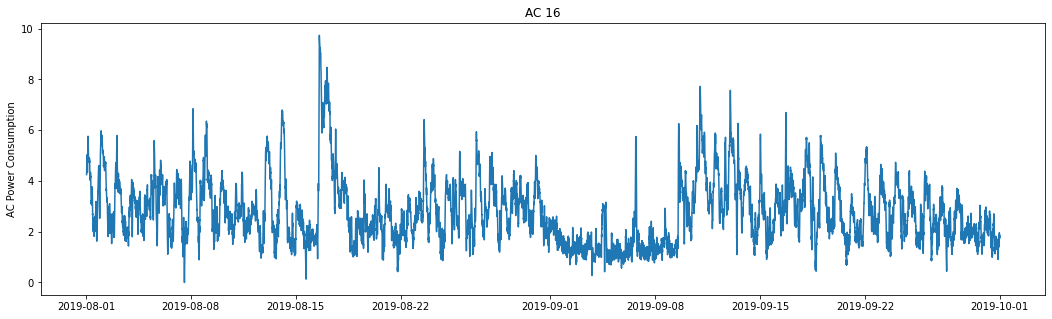

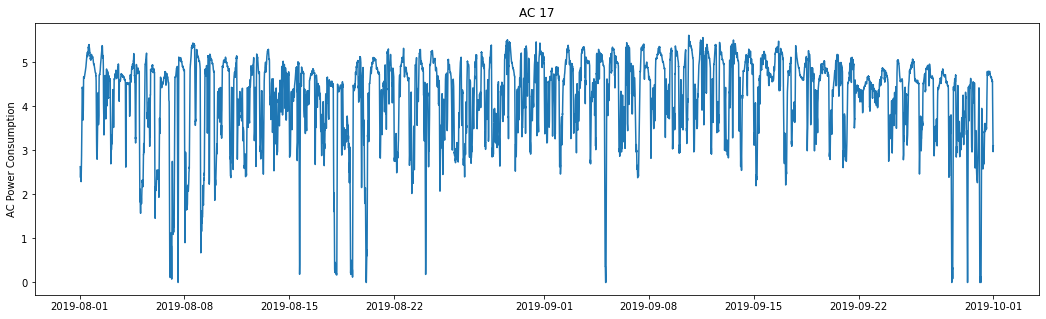

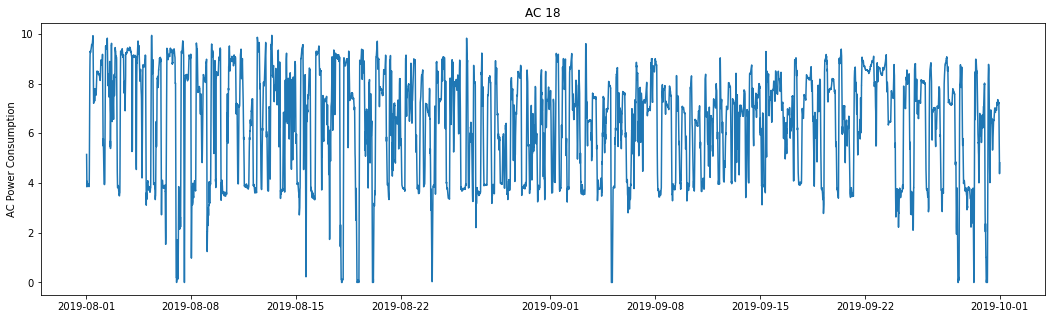

In [16]:
# Hourly mean power consumption plot for each AC
for col in df.columns:
    if col != "Weekday":
        plt.figure(figsize= (18,5))
        plt.plot(df.rolling(window=60).mean()[col]);
        plt.title(col)
        plt.ylabel('AC Power Consumption')

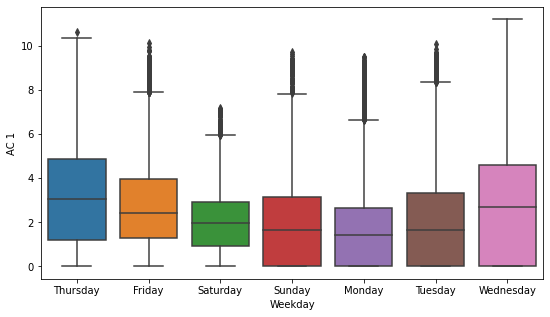

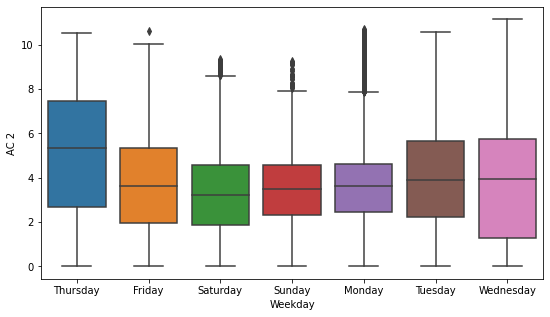

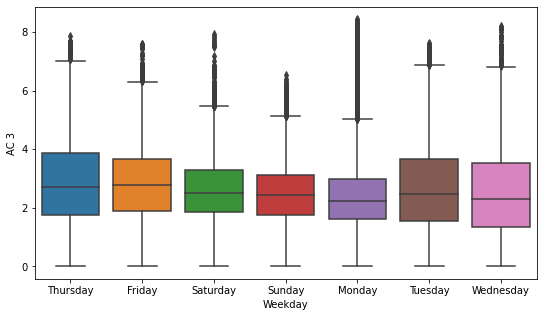

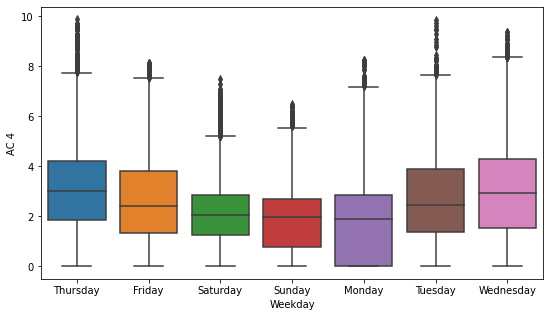

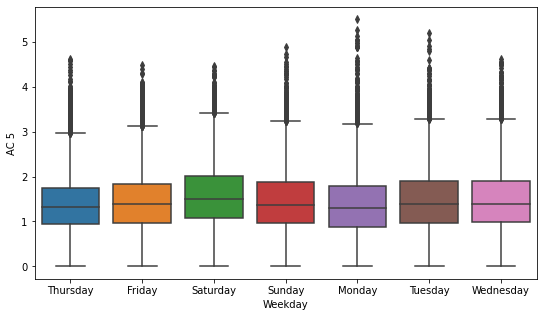

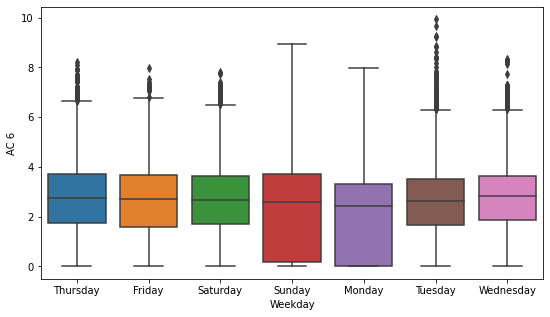

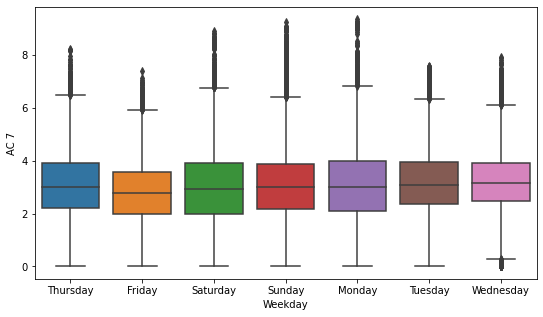

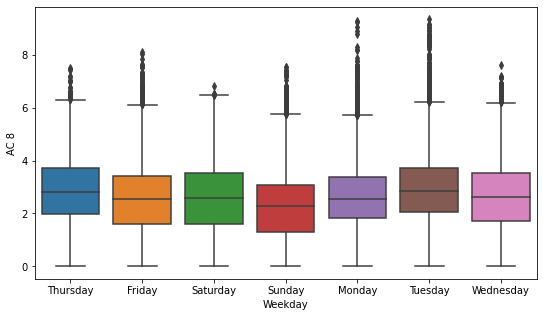

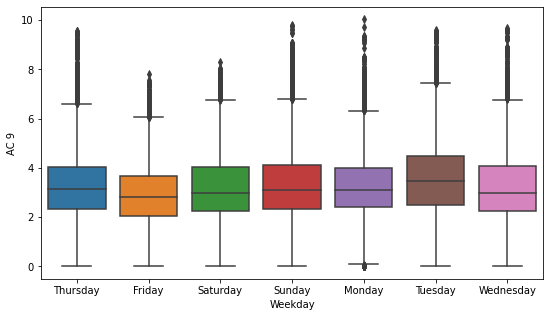

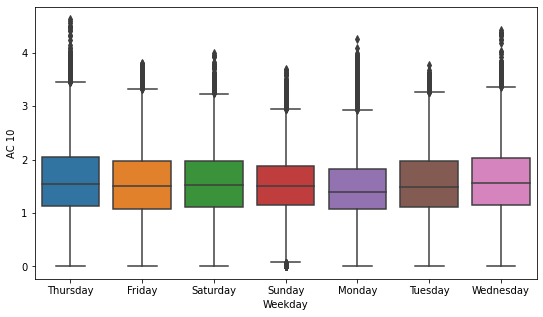

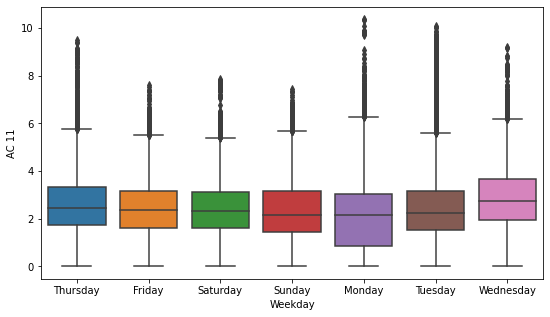

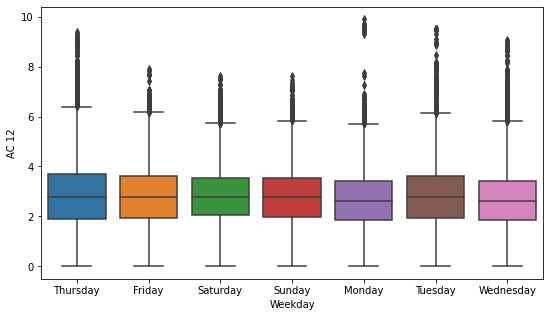

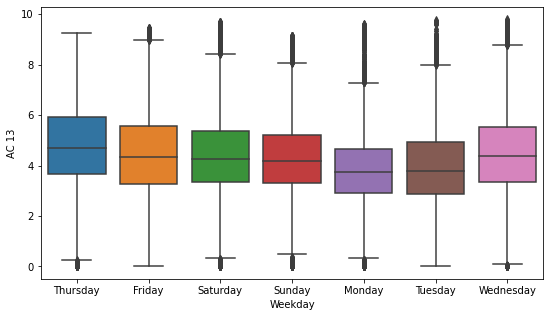

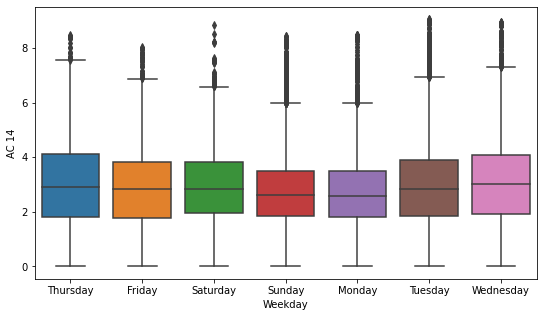

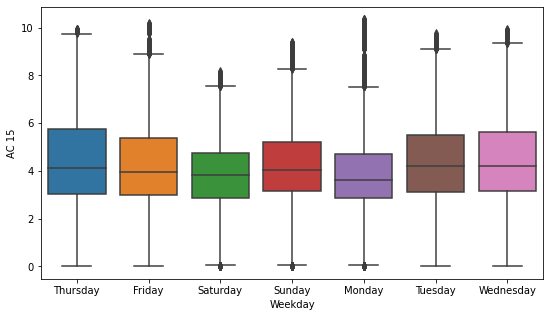

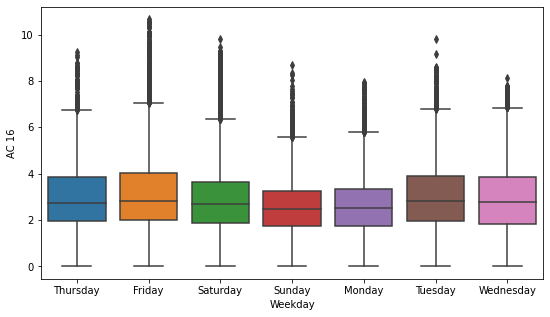

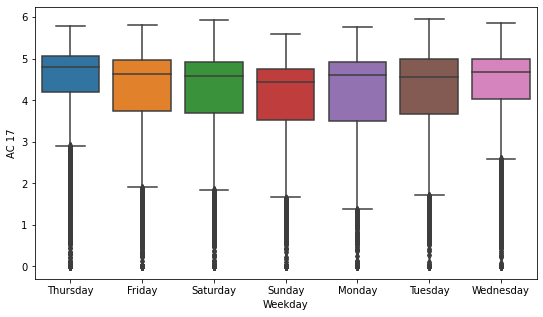

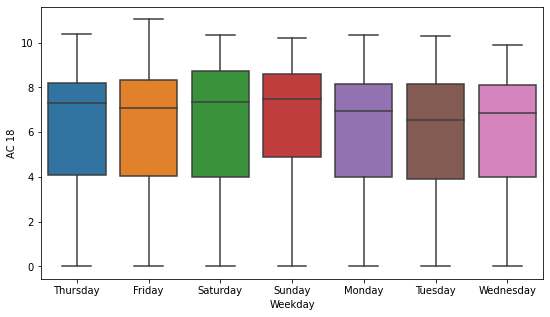

In [17]:
# Day wise power distribution of different AC's
for col in df.columns:
    if col != "Weekday":
        plt.figure(figsize= (9,5))
        sns.boxplot(data=df, x='Weekday', y=col);

### Generally the ACs are mostly unit consuming on Wednesdays and Thursdays

In [18]:
df['date'] = [d.date() for d in df.index]
df['time'] = [d.time() for d in df.index]

### Top 5 days of consumption for each AC

In [19]:
for col in df.columns:
    if col not in ['date','Weekday', 'time']:
        print(df.groupby(['date'])[col].mean().nlargest(5))

date
2019-09-17    5.021794
2019-09-16    5.000605
2019-08-08    4.992387
2019-09-12    4.952980
2019-09-11    4.612946
Name: AC 1, dtype: float64
date
2019-09-12    7.895136
2019-08-27    7.454415
2019-08-01    7.192770
2019-08-22    7.113283
2019-08-08    6.758700
Name: AC 2, dtype: float64
date
2019-09-12    4.910210
2019-09-11    4.195806
2019-09-17    4.180782
2019-09-10    4.006848
2019-09-21    3.793172
Name: AC 3, dtype: float64
date
2019-09-11    5.122536
2019-08-21    4.856118
2019-09-12    4.734941
2019-08-27    4.646604
2019-08-20    4.287947
Name: AC 4, dtype: float64
date
2019-09-08    2.129743
2019-08-31    2.038078
2019-08-10    1.897505
2019-08-21    1.885593
2019-09-11    1.884024
Name: AC 5, dtype: float64
date
2019-09-08    4.064481
2019-09-15    3.838988
2019-08-05    3.793809
2019-09-11    3.680946
2019-08-10    3.614641
Name: AC 6, dtype: float64
date
2019-09-08    4.699786
2019-09-09    3.949103
2019-09-07    3.938103
2019-09-10    3.812886
2019-08-12    3.80167

In [20]:
usage = []
AC_name = []
for col in df.columns:
    if col not in ['date','Weekday', 'time']: 
        usage.append(df[col].mean())
        AC_name.append(col)
usage

[2.3700894968045088,
 3.8538155885544945,
 2.558766067008718,
 2.386022834356637,
 1.4165422360455997,
 2.5087902517863117,
 2.9685210856988014,
 2.5388610892262196,
 3.1697020294485276,
 1.5321830893751536,
 2.3956206110881304,
 2.6894666026247687,
 4.26364400921706,
 2.9057286063847307,
 4.030858248967377,
 2.7897318124692254,
 4.203549776000847,
 6.439510898048797]

### AC with the most power usage is "AC 18" and the least power usage is of "AC 5"

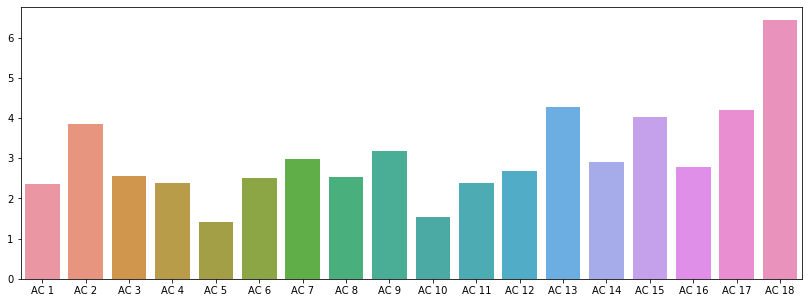

In [21]:
# Plot of power consumption of different AC's
plt.figure(figsize= (14,5))
sns.barplot(x=AC_name, y=usage);

In [22]:
# Aug = pd.read_clipboard()

In [23]:
# Aug.to_csv("Aug.csv",index= False)

In [24]:
# Sep = pd.read_clipboard();

In [25]:
# Sep.to_csv("Sep.csv",index= False)

In [26]:
Aug = pd.read_csv("Aug.csv")
Sep = pd.read_csv("Sep.csv")

In [27]:
Aug

,Aug,Max,Avg,Min
0,1,95,88.5,84
1,2,91,84.5,81
2,3,88,83.2,81
3,4,102,86.0,82
4,5,95,88.0,82
5,6,84,81.3,77
6,7,93,86.3,81
7,8,99,90.6,82
8,9,91,84.7,0
9,10,90,85.2,81


In [28]:
Sep

,Sep,Max,Avg,Min
0,1,90,84.7,81
1,2,95,88.0,81
2,3,95,88.7,84
3,4,93,87.5,82
4,5,95,87.7,82
5,6,95,86.3,81
6,7,93,85.4,81
7,8,95,88.8,81
8,9,97,90.3,84
9,10,97,90.5,84


In [31]:
df_daily = df.resample('D').mean()

In [32]:
df_daily

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date,,,,,,,,,,,,,,,,,,
2019-08-01,4.311251,7.192770,2.265914,3.309945,1.441098,2.799339,2.606838,3.255770,2.253709,1.761544,1.795998,2.539742,4.715200,3.059296,4.298479,3.618519,4.639993,7.561096
2019-08-02,3.973570,4.994283,2.906913,3.156086,1.637944,2.340743,2.333826,1.483584,2.634760,1.764228,2.006679,2.794886,5.123384,2.353006,4.456761,3.437278,4.440410,7.781819
2019-08-03,3.254814,4.284937,2.929456,1.901404,1.372715,2.555402,3.181457,1.283756,2.752286,1.461661,2.173384,3.075726,4.803871,1.863641,4.464468,2.929687,4.381375,7.877919
2019-08-04,4.107448,4.363372,2.573505,1.547759,1.527378,3.544164,2.800646,1.551463,2.494730,1.686486,1.824202,3.019724,4.911020,2.204187,4.597687,2.859617,4.473516,8.216435
2019-08-05,3.532777,4.006711,1.785850,0.904371,1.671560,3.793809,2.483717,1.642972,2.596842,1.420698,3.347532,3.107324,4.174634,2.795171,5.002413,3.461183,3.809580,6.104132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-26,3.501291,4.147050,2.645136,3.373753,1.443304,2.301537,2.060002,2.278169,2.929070,1.455738,3.163686,2.494066,4.909752,2.816173,4.502781,2.575450,4.330649,6.367228
2019-09-27,2.295600,3.281170,1.660224,2.620449,0.888126,2.355991,2.285244,2.892445,2.422963,1.256133,2.435200,2.531860,4.244210,2.701181,3.960751,2.212325,4.262345,6.890618
2019-09-28,1.187906,3.223356,1.855437,1.510008,1.301498,2.173673,1.870355,2.321835,2.441901,1.307919,1.820509,2.301743,3.181346,2.729225,3.126808,2.431250,3.239554,4.270624


In [33]:
df_temp = pd.concat([Aug["Max"],Sep["Max"]],axis=0)
df_temp.index = df_daily.index

In [34]:
df_temp.head()

Date
2019-08-01     95
2019-08-02     91
2019-08-03     88
2019-08-04    102
2019-08-05     95
Freq: D, Name: Max, dtype: int64

In [35]:
# df_daily.drop(["Temp"],inplace=True,axis =1)

In [36]:
df_daily.insert(0, 'Temp',df_temp)
df_daily

,Temp,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date,,,,,,,,,,,,,,,,,,,
2019-08-01,95,4.311251,7.192770,2.265914,3.309945,1.441098,2.799339,2.606838,3.255770,2.253709,1.761544,1.795998,2.539742,4.715200,3.059296,4.298479,3.618519,4.639993,7.561096
2019-08-02,91,3.973570,4.994283,2.906913,3.156086,1.637944,2.340743,2.333826,1.483584,2.634760,1.764228,2.006679,2.794886,5.123384,2.353006,4.456761,3.437278,4.440410,7.781819
2019-08-03,88,3.254814,4.284937,2.929456,1.901404,1.372715,2.555402,3.181457,1.283756,2.752286,1.461661,2.173384,3.075726,4.803871,1.863641,4.464468,2.929687,4.381375,7.877919
2019-08-04,102,4.107448,4.363372,2.573505,1.547759,1.527378,3.544164,2.800646,1.551463,2.494730,1.686486,1.824202,3.019724,4.911020,2.204187,4.597687,2.859617,4.473516,8.216435
2019-08-05,95,3.532777,4.006711,1.785850,0.904371,1.671560,3.793809,2.483717,1.642972,2.596842,1.420698,3.347532,3.107324,4.174634,2.795171,5.002413,3.461183,3.809580,6.104132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-26,88,3.501291,4.147050,2.645136,3.373753,1.443304,2.301537,2.060002,2.278169,2.929070,1.455738,3.163686,2.494066,4.909752,2.816173,4.502781,2.575450,4.330649,6.367228
2019-09-27,86,2.295600,3.281170,1.660224,2.620449,0.888126,2.355991,2.285244,2.892445,2.422963,1.256133,2.435200,2.531860,4.244210,2.701181,3.960751,2.212325,4.262345,6.890618
2019-09-28,88,1.187906,3.223356,1.855437,1.510008,1.301498,2.173673,1.870355,2.321835,2.441901,1.307919,1.820509,2.301743,3.181346,2.729225,3.126808,2.431250,3.239554,4.270624


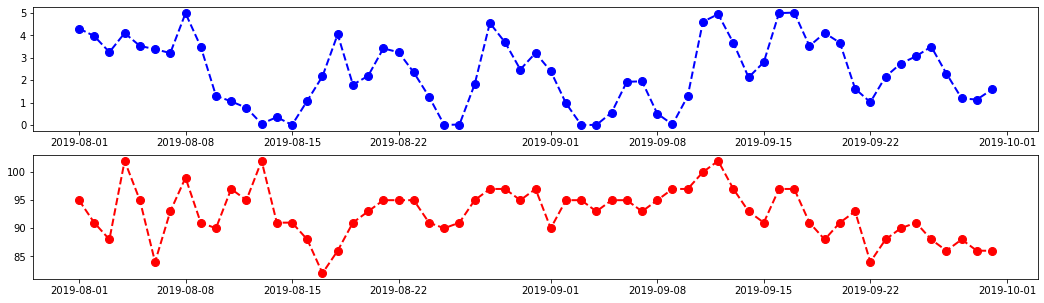

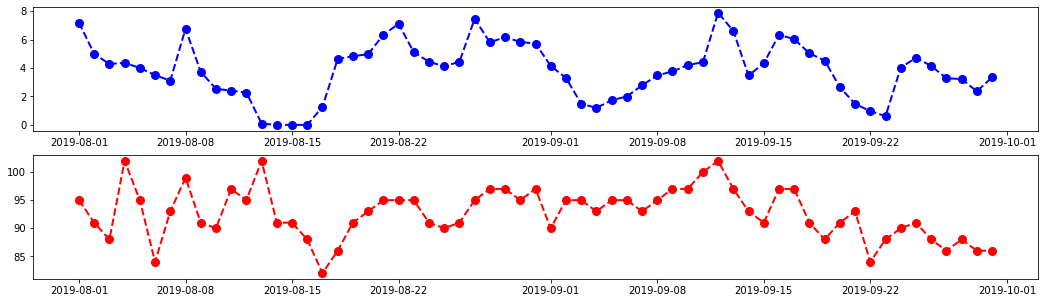

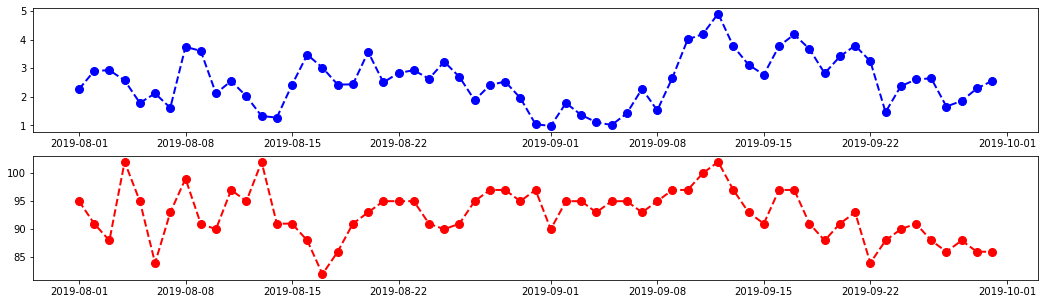

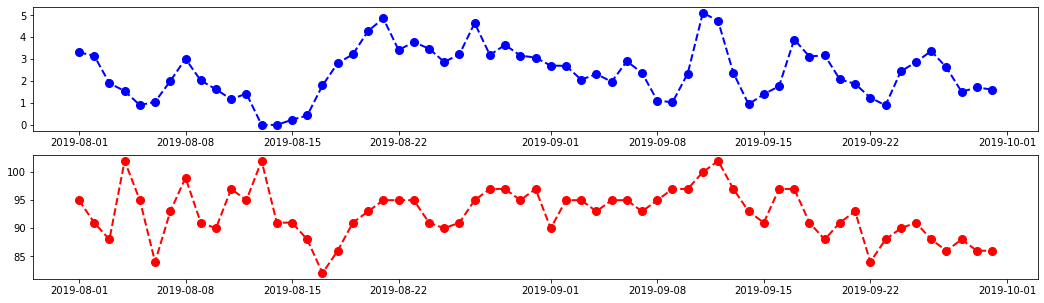

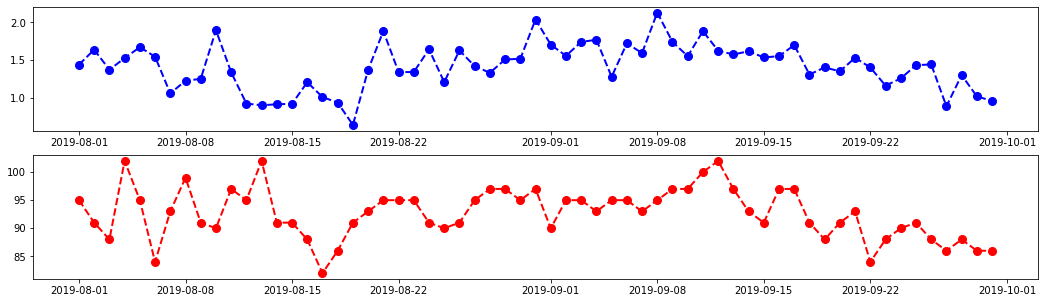

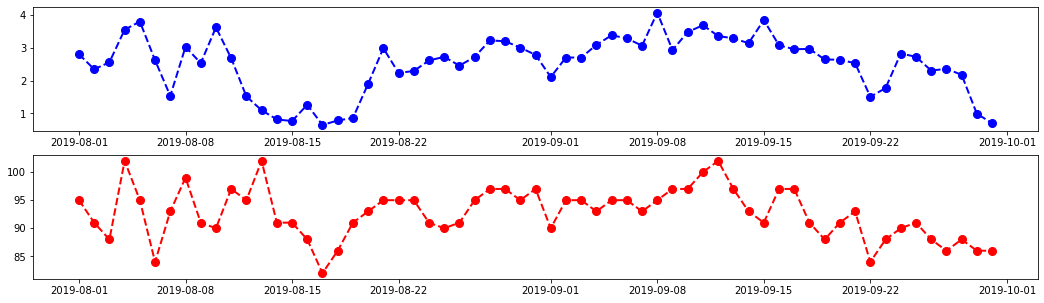

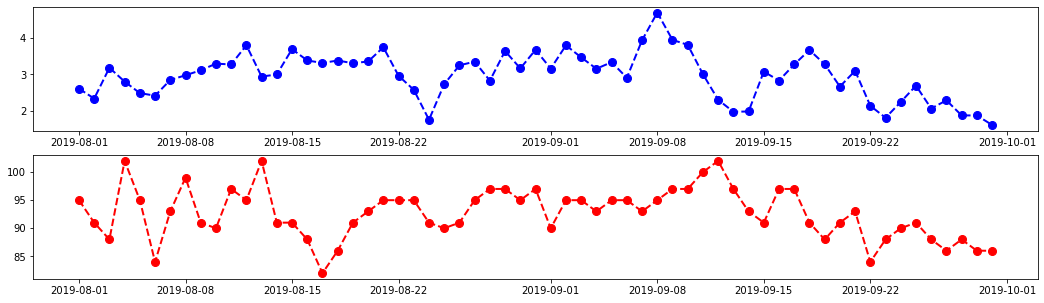

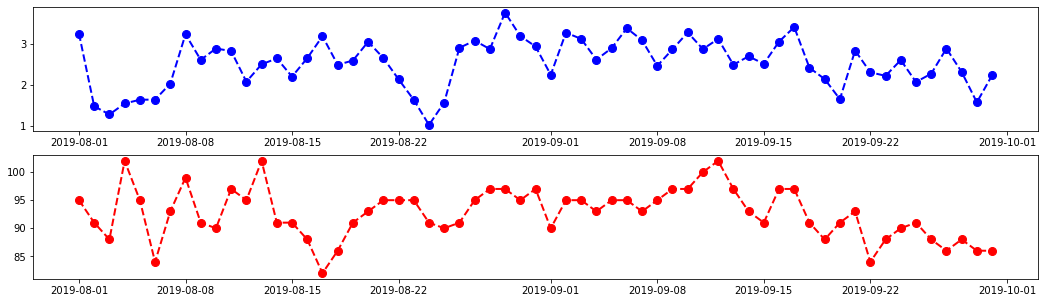

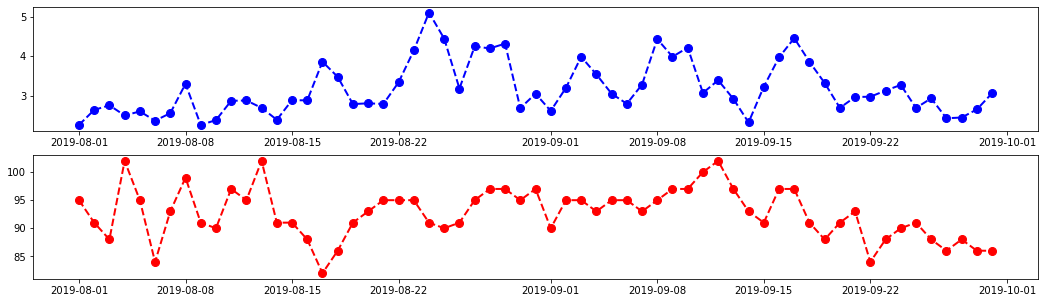

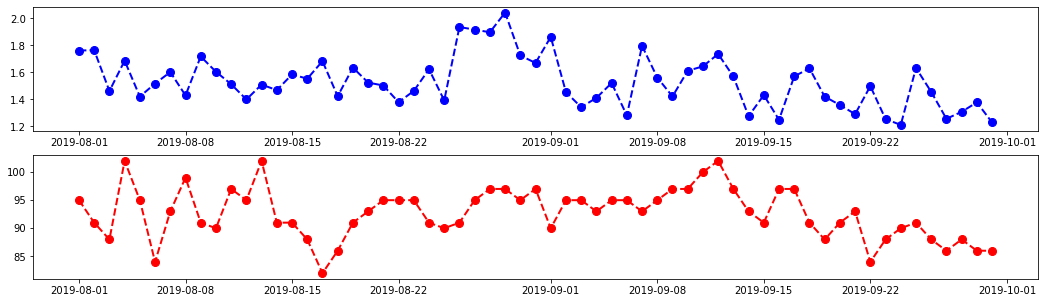

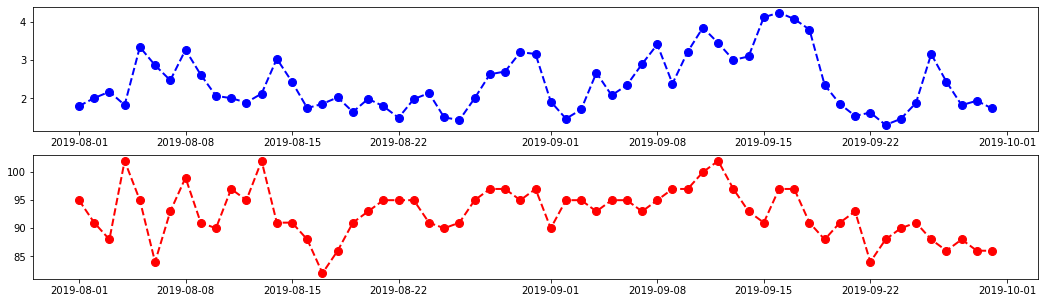

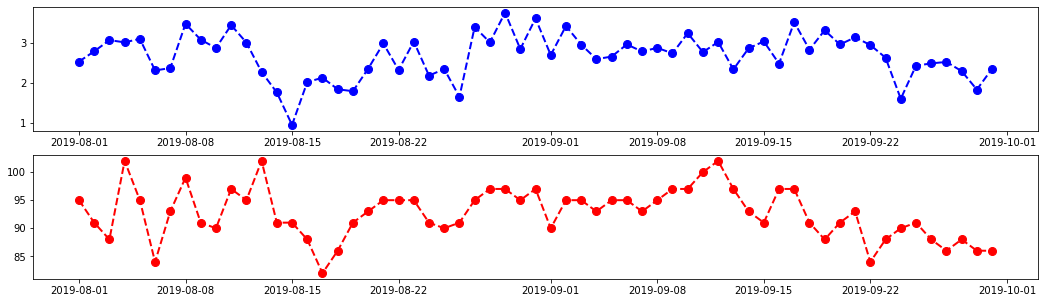

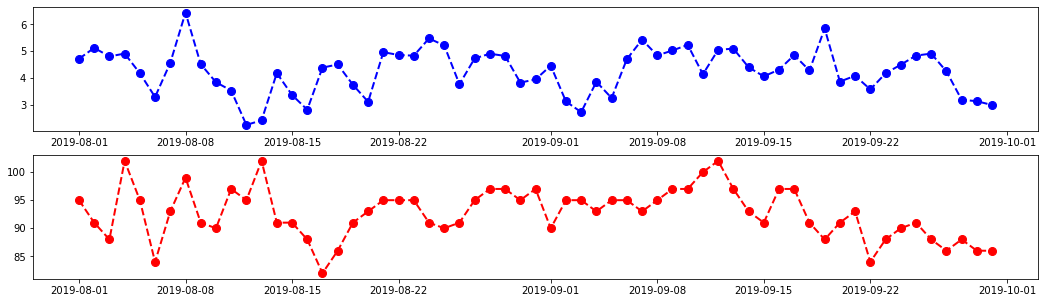

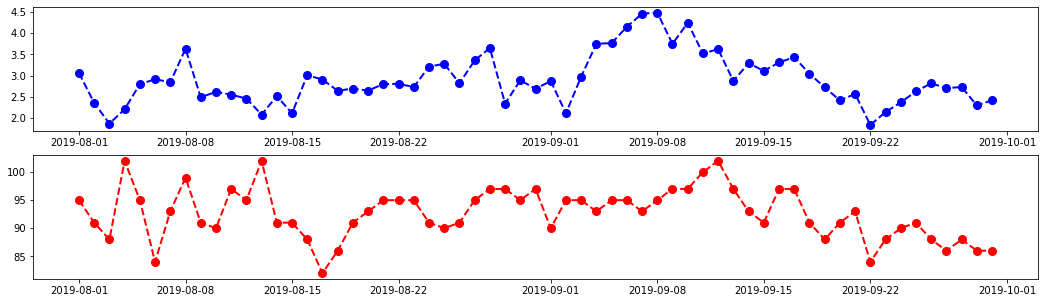

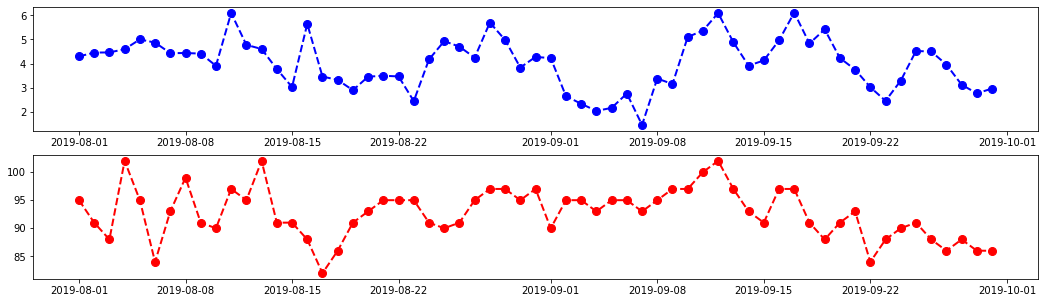

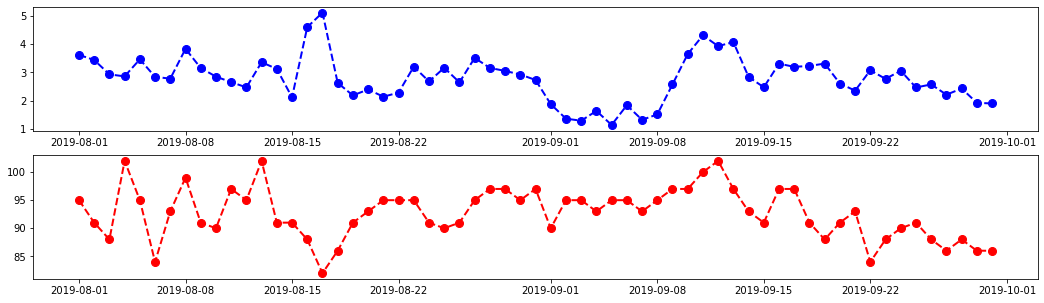

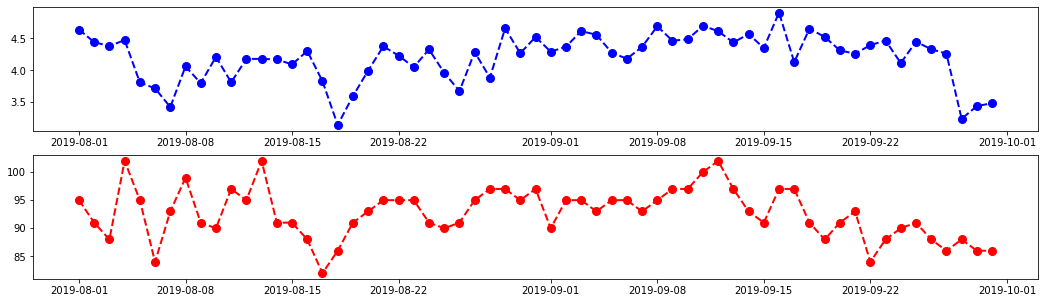

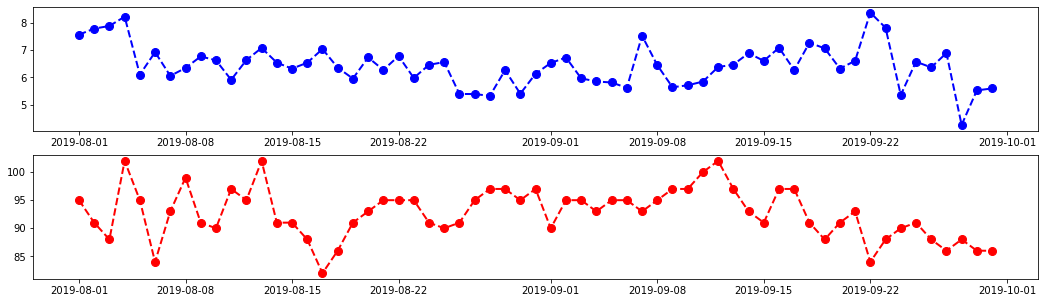

In [39]:
for col in df_daily.columns:
    if col != "Temp":
        plt.figure(figsize= (18,5))
  
# For Power plot
        plt.subplot(2, 1, 1)
        plt.plot(df_daily.index,df_daily[col],color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=8)
        
  
# For Temperature Function
        plt.subplot(2, 1, 2)
        plt.plot(df_daily.index,df_daily["Temp"],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=8)
#         axis[1, 0].set_title("Cosine Function")